In [3]:
import pandas as pd
import numpy as np

### Time as a continous variable
The datetime64[ns] type represents dates and times down to the nanosecond. It is a NumPy data type that is based on the datetime module of Python. Because the datetime64 object is limited to 64-bit precision,  if you want a time resolution of one nanosecond, you only have enough information to encode a range of 2^64 nanosecond.r just under 600 years So tThe datetime64[ns] data type can represent dates and times ranging from 1678 AD to 2262 AD with a resolution of nanoseconds. Pandas uses ns i.e. datetime64[ns] as a default, but allows used to choose other code with datetime64.  
<img title="a title" alt="datetime[64 codes. see http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html" src="datetime64Codes.png"> 


0 time -> 1970-01-01 00:00:00 (Unix Epoch)

In [5]:
np.datetime64(0,"D") # 0 is the epoch and D is the unit of time

numpy.datetime64('1970-01-01')

In [8]:
print(np.datetime64(-1,"D"))
print(np.datetime64(-1,"Y"))
np.datetime64(-1,"M")

1969-12-31
1969


numpy.datetime64('1969-12')

In [2]:
df = pd.DataFrame({
    "date": ["Jan-23", "Mar-23", "Apr-23", "May-23"],
    "value": [10, 30, 20, 50]
})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4 non-null      object
 1   value   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
None


In [9]:
df 

,date,value
0,Jan-23,10
1,Mar-23,30
2,Apr-23,20
3,May-23,50


In [10]:
'''
to_datetime() takes a string and converts it to a datetime object.
parameters: to_datetime(string, format=)
format options : %b-%y, %d-%b-%y, %d-%m-%y, %d-%m-%Y, %d-%m-%Y %H:%M:%S, %d-%m-%Y %H:%M, %d-%m-%Y %H, %
Refer Documentation for more options : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
'''
df["date"]=pd.to_datetime(df["date"],format="%b-%y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   value   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes
None


In [11]:
df 

,date,value
0,2023-01-01,10
1,2023-03-01,30
2,2023-04-01,20
3,2023-05-01,50


For date format code see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [12]:
df["month"]=df["date"].dt.month_name() # convert to month name
df["year"]=df["date"].dt.year # convert to year
df["day"]=df["date"].dt.day_name()
df["dat"]=df["date"].dt.date
df["localDate"]=df["date"].dt.strftime('%d/%m/%Y') #strftime: string format time
df

,date,value,month,year,day,dat,localDate
0,2023-01-01,10,January,2023,Sunday,2023-01-01,01/01/2023
1,2023-03-01,30,March,2023,Wednesday,2023-03-01,01/03/2023
2,2023-04-01,20,April,2023,Saturday,2023-04-01,01/04/2023
3,2023-05-01,50,May,2023,Monday,2023-05-01,01/05/2023


In [13]:
df.set_index("date")

,value,month,year,day,dat,localDate
date,,,,,,
2023-01-01,10,January,2023,Sunday,2023-01-01,01/01/2023
2023-03-01,30,March,2023,Wednesday,2023-03-01,01/03/2023
2023-04-01,20,April,2023,Saturday,2023-04-01,01/04/2023
2023-05-01,50,May,2023,Monday,2023-05-01,01/05/2023


### Pandas Transpose of the Data Frame: 
Rows become columns and column become rows.

In [14]:
df.set_index("date").T

date,2023-01-01,2023-03-01,2023-04-01,2023-05-01
value,10,30,20,50
month,January,March,April,May
year,2023,2023,2023,2023
day,Sunday,Wednesday,Saturday,Monday
dat,2023-01-01,2023-03-01,2023-04-01,2023-05-01
localDate,01/01/2023,01/03/2023,01/04/2023,01/05/2023


### Yfinance for stock market data

In [15]:
import yfinance as yfin # Gives live stock data from Yahoo Finance API, free of charge
start='2019-09-10'
end='2023-09-05'
yfin.Ticker("GE").history(start=start,end=end)
# in India, yfinance supports nse only for now

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-10 00:00:00-04:00,54.751955,56.964157,54.690506,56.165306,10026579,0.000000,0.0
2019-09-11 00:00:00-04:00,56.226748,57.517200,55.673698,57.517200,9142321,0.000000,0.0
2019-09-12 00:00:00-04:00,57.763006,58.500408,56.656909,56.902706,10906930,0.000000,0.0
2019-09-13 00:00:00-04:00,57.271805,58.133032,56.226024,57.456352,7300003,0.062451,0.0
2019-09-16 00:00:00-04:00,57.210283,57.948482,56.410572,57.702415,7325463,0.000000,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,112.550003,114.279999,112.150002,113.959999,2812700,0.000000,0.0
2023-08-29 00:00:00-04:00,113.669998,115.669998,112.919998,115.330002,4655300,0.000000,0.0
2023-08-30 00:00:00-04:00,114.849998,115.580002,113.949997,114.309998,4857600,0.000000,0.0


**Adjusted close** is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

In [16]:
yfin.Ticker('ADANIPOWER.NS').history(start=start, end=end)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-11 00:00:00+05:30,60.599998,64.500000,60.549999,63.750000,15589815,0.0,0.0
2019-09-12 00:00:00+05:30,64.449997,65.199997,63.000000,63.799999,11940537,0.0,0.0
2019-09-13 00:00:00+05:30,63.599998,65.150002,62.200001,64.599998,9349038,0.0,0.0
2019-09-16 00:00:00+05:30,64.099998,65.650002,63.799999,64.699997,10353566,0.0,0.0
2019-09-17 00:00:00+05:30,65.199997,65.400002,63.549999,63.799999,9802730,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-29 00:00:00+05:30,322.850006,338.850006,315.899994,332.700012,25217118,0.0,0.0
2023-08-30 00:00:00+05:30,334.350006,336.299988,326.350006,328.399994,9128939,0.0,0.0
2023-08-31 00:00:00+05:30,314.000000,324.299988,309.000000,321.299988,21870905,0.0,0.0


### [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for aquiring Stock market data.
Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.

NSE: National Stock Exchange of India Limited. Learn more from https://www.investopedia.com/terms/n/national_stock_exchange.asp

In [17]:
#!pip install pandas-datareader 
from pandas_datareader import data # used to import stock data from yahoo finance and  other sources
from pandas_datareader import wb # used to import world bank data and other sources
yfin.pdr_override() # See https://pypi.org/project/yfinance/ #pdr_override() is used to override the default pandas datareader with yfinance so that we can use yfinance to import data from yahoo finance
data.get_data_yahoo('GE', start='2019-09-10', end='2019-10-09')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-10,55.644028,57.892273,55.581577,57.080406,56.165306,10026579
2019-09-11,57.142857,58.454334,56.580795,58.454334,57.517204,9142321
2019-09-12,58.704136,59.453552,57.580017,57.829819,56.902699,10906930
2019-09-13,58.142078,59.016392,57.080406,58.329430,57.456356,7300003
2019-09-16,58.079624,58.829041,57.267761,58.579235,57.702423,7325463
2019-09-17,58.079624,58.641685,57.767368,58.454334,57.579388,6077384
2019-09-18,58.142078,58.641685,57.330212,58.579235,57.702423,6448346
2019-09-19,58.391880,59.328648,58.329430,58.829041,57.948483,5433890
2019-09-20,59.078846,59.578453,58.329430,58.516785,57.640903,9212055


In [18]:
df_adani = data.get_data_yahoo('ADANIPOWER.NS', start=start, end=end)
df_adani.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-11,60.599998,64.500000,60.549999,63.750000,63.750000,15589815
2019-09-12,64.449997,65.199997,63.000000,63.799999,63.799999,11940537
2019-09-13,63.599998,65.150002,62.200001,64.599998,64.599998,9349038
2019-09-16,64.099998,65.650002,63.799999,64.699997,64.699997,10353566
2019-09-17,65.199997,65.400002,63.549999,63.799999,63.799999,9802730


In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,3)})

[Text(0.5, 1.0, 'Adani Power stock performance')]

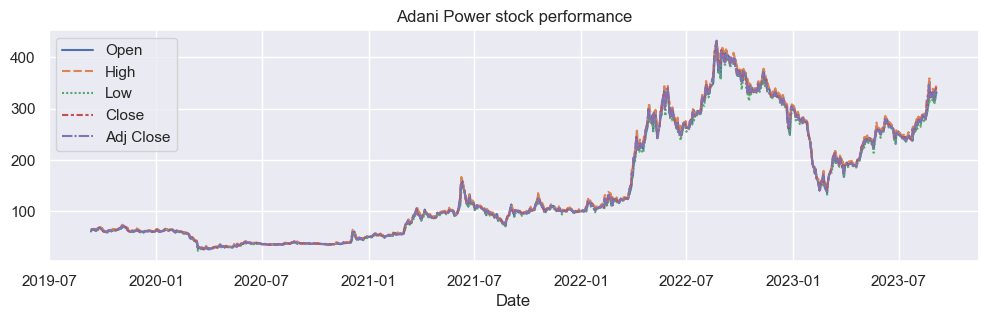

In [21]:
import warnings
warnings.filterwarnings('ignore')

sns.lineplot(df_adani.drop(columns="Volume")).set(title="Adani Power stock performance") #, dashes=False. Volume had to be dropped since its in millions of stocks traded (too big a number to plot)

<Axes: xlabel='Date'>

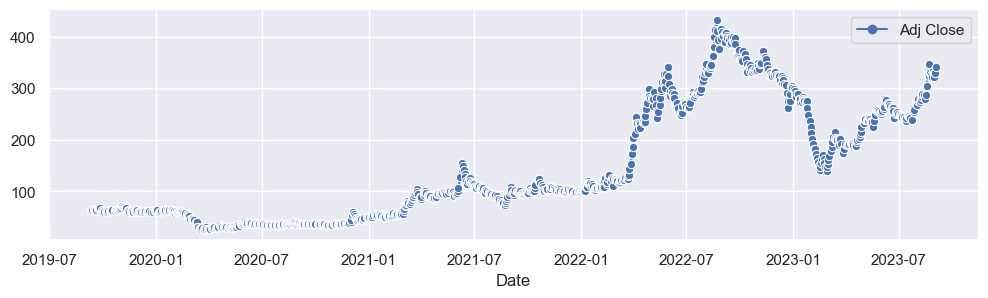

In [22]:
sns.lineplot(df_adani[["Adj Close"]], markers=True)

<Axes: xlabel='Date'>

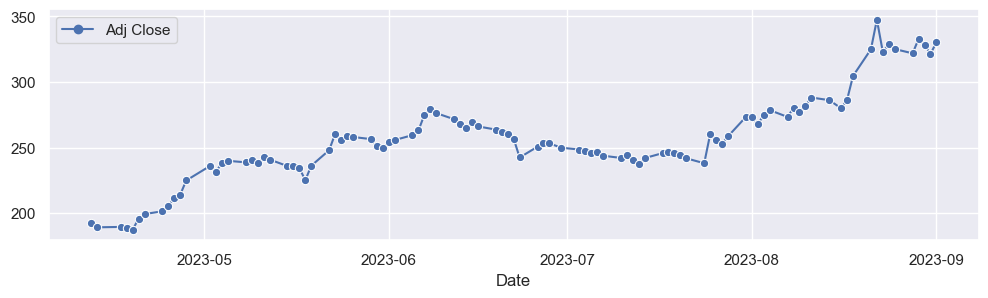

In [23]:
sns.lineplot(df_adani[["Adj Close"]].iloc[-100:-1], markers=True)

# If intervals are not uniform, we can use markers=True to show the data points using points instead of smooth curves.

In [24]:
import plotly.express as px

In [25]:
px.line(df_adani.drop("Volume",axis=1), title="Adani Powers stock performance") #, markers=True

In [27]:
px.line(df_adani[["Adj Close"]][-100:-1], markers=True)

### Pandas DataFrame with Multi-index columns

In [28]:
df = data.get_data_yahoo('ADANIPOWER.NS TATASTEEL.NS RPOWER.NS',start=start, end=end)

[*********************100%%**********************]  3 of 3 completed


In [29]:
df.head()

Adj Close                                Close            \
           ADANIPOWER.NS RPOWER.NS TATASTEEL.NS ADANIPOWER.NS RPOWER.NS   
Date                                                                      
2019-09-11     63.750000      3.45    15.063929     63.750000      3.45   
2019-09-12     63.799999      3.35    14.981846     63.799999      3.35   
2019-09-13     64.599998      3.30    15.076239     64.599998      3.30   
2019-09-16     64.699997      3.35    14.819735     64.699997      3.35   
2019-09-17     63.799999      3.20    14.156930     63.799999      3.20   

                                 High                                  Low  \
           TATASTEEL.NS ADANIPOWER.NS RPOWER.NS TATASTEEL.NS ADANIPOWER.NS   
Date                                                                         
2019-09-11    36.705002     64.500000      3.50    36.869999     60.549999   
2019-09-12    36.505001     65.199997      3.55    37.950001     63.000000   
2019-09-13    36.735001     65.150002      3.35    36.915001     62.200001   
2019-09-16    36.110001     65.650002      3.40    36.639999     63.799999   
2019-09-17    34.494999     65.400002      3.45    36.599998     63.549999   

                                           Open                         \
           RPOWER.NS TATASTEEL.NS ADANIPOWER.NS RPOWER.NS TATASTEEL.NS   
Date                                                                     
2019-09-11      3.35    35.520000     60.599998      3.35    35.529999   
2019-09-12      3.30    36.299999     64.449997      3.45    36.880001   
2019-09-13      3.20    35.775002     63.599998      3.35    36.700001   
2019-09-16      3.20    35.860001     64.099998      3.25    36.200001   
2019-09-17      3.20    34.205002     65.199997      3.40    36.119999   

                  Volume                         
           ADANIPOWER.NS RPOWER.NS TATASTEEL.NS  
Date                                             
2019-09-11      15589815  11356918    136500270  
2019-09-12      11940537  16994759    188468200  
2019-09-13       9349038  10131838    116222490  
2019-09-16      10353566  14184983     80643190  
2019-09-17       9802730  10680754    131984000

In [30]:
df["Adj Close"].head()
px.line(df["Adj Close"])

### Candlestick plot:
A visual tool that shows fluctuations in an asset's past and current prices. The candle has three parts: the upper shadow, the real body, and the lower shadow. Stock market analysts and traders use this tool to anticipate future movement in an asset's price. Each of the candle sticks look like a box plot with completely different meaning.

<img title="a title" alt="see https://en.wikipedia.org/wiki/Candlestick_chart"  src="candlestick.png" style="width:500px;">


In [33]:
#!pip install mplfinance
import mplfinance as fin # mplfinance is a package that makes it easy to create candlestick charts

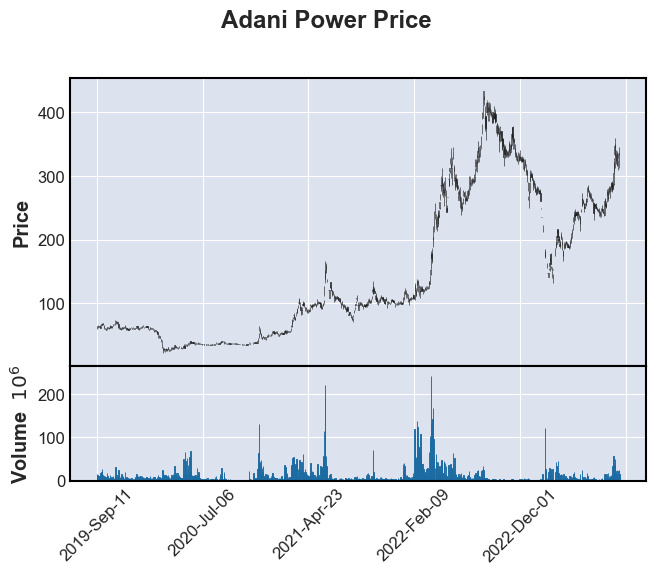

In [34]:
fin.plot(df_adani,type='candle',title = "Adani Power Price", volume=True)

# Since lot of data points are present, candles are not clearly visible. Hence, we will plot only 10 data points

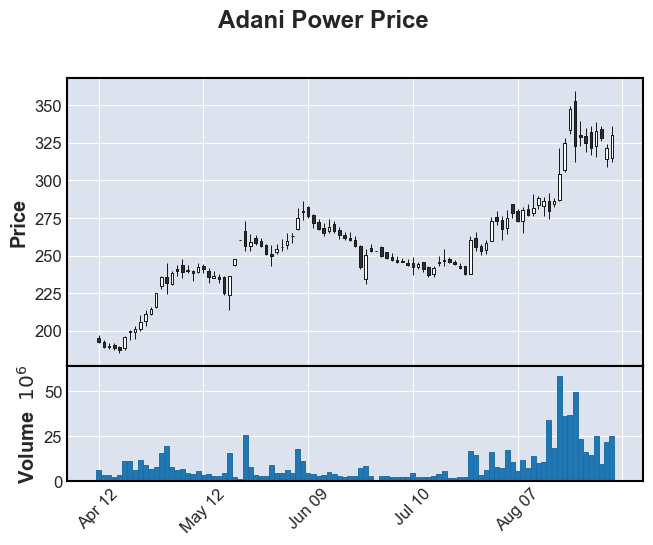

In [35]:
fin.plot(df_adani.iloc[-100:-1],type='candle',title = "Adani Power Price", volume=True)

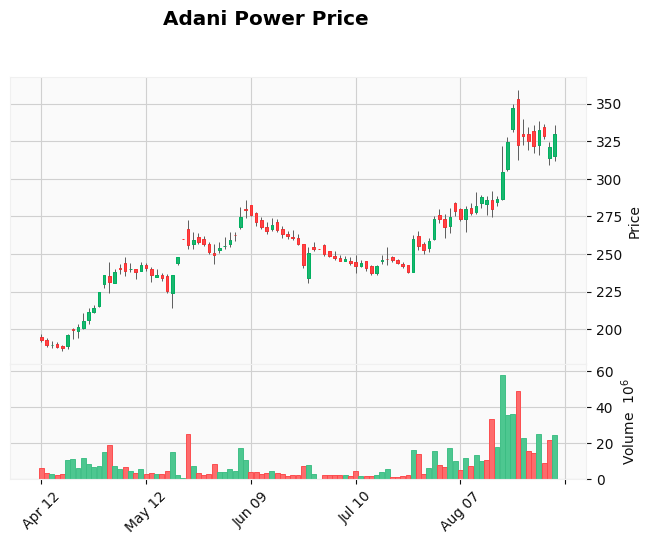

In [36]:
fin.plot(df_adani.iloc[-100:-1],
            type='candle',
            title = "Adani Power Price", 
            style="yahoo", # gives colour to the graph
            volume=True
)#mav =(3,6,9) moving average


In [37]:
import plotly.graph_objects as go 
df=df_adani.iloc[-100:-1].copy()
go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])]
         ).update_layout(title="Adani Power Price",height=500)

### Radar Chart Chart / Spider Chart / Polar line chart
The circular chart to show cyclic data.
Example: Monthly local min/max temperature Data in a year./

In [38]:
df0 = pd.read_csv("temperature.csv")

In [39]:
df0

,month,max,min
0,17-Jan,31.4,13.6
1,17-Feb,34.5,15.6
2,17-Mar,37.3,19.8
3,17-Apr,40.8,24.1
4,17-May,41.0,27.4
5,17-Jun,34.1,25.2
6,17-Jul,31.7,24.4
7,17-Aug,30.9,23.5
8,17-Sep,32.1,23.5
9,17-Oct,32.6,21.8


In [40]:
df=df0.copy()
df.set_index("month", inplace=True)

In [41]:
df.index

Index(['17-Jan', '17-Feb', '17-Mar', '17-Apr', '17-May', '17-Jun', '17-Jul',
       '17-Aug', '17-Sep', '17-Oct', '17-Nov', '17-Dec'],
      dtype='object', name='month')

In [42]:
df.index=pd.to_datetime(df.index, format="%y-%b") 
df.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [43]:
px.line(df,title="Monthly Min Max Temperature",markers=True)

Text(0.5, 1.0, 'Monthly Min Max Temperature')

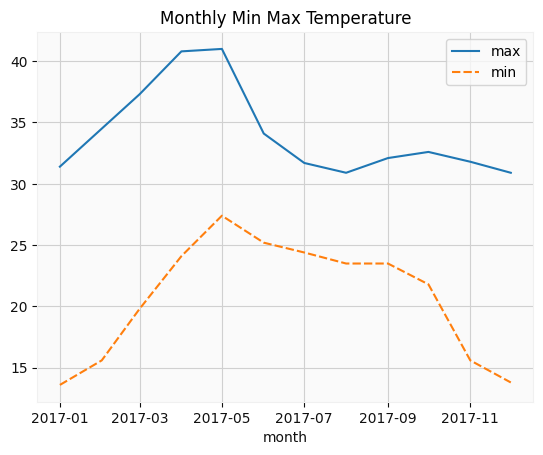

In [44]:
sns.lineplot(df).set_title("Monthly Min Max Temperature")

Text(0.5, 1.0, 'Monthly Min Max Temperature')

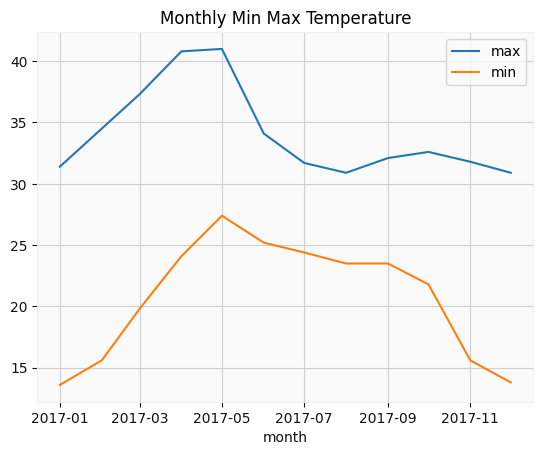

In [45]:
sns.lineplot(df, dashes=False).set_title("Monthly Min Max Temperature")

In [46]:
df

,max,min
month,,
2017-01-01,31.4,13.6
2017-02-01,34.5,15.6
2017-03-01,37.3,19.8
2017-04-01,40.8,24.1
2017-05-01,41.0,27.4
2017-06-01,34.1,25.2
2017-07-01,31.7,24.4
2017-08-01,30.9,23.5
2017-09-01,32.1,23.5


In [47]:
df1=df.reset_index()

In [48]:
df1["month name"] = df1["month"].dt.month_name()
df1

,month,max,min,month name
0,2017-01-01,31.4,13.6,January
1,2017-02-01,34.5,15.6,February
2,2017-03-01,37.3,19.8,March
3,2017-04-01,40.8,24.1,April
4,2017-05-01,41.0,27.4,May
5,2017-06-01,34.1,25.2,June
6,2017-07-01,31.7,24.4,July
7,2017-08-01,30.9,23.5,August
8,2017-09-01,32.1,23.5,September
9,2017-10-01,32.6,21.8,October


In [49]:
px.line_polar(df1, r="max", theta="month name", line_close=True, height = 500)

### Convert a DataFrame from Wide format to long format
A *wide format* contains values that do not repeat values in the columns.

*A long form*at contains values that do repemn.

In [50]:
df1.head()

,month,max,min,month name
0,2017-01-01,31.4,13.6,January
1,2017-02-01,34.5,15.6,February
2,2017-03-01,37.3,19.8,March
3,2017-04-01,40.8,24.1,April
4,2017-05-01,41.0,27.4,May


In [ ]:
df_2017_melt = pd.melt(df_2017.reset_index(), id_vars=["index"], value_vars=['Min', 'Max'])
df_2017_melt.head()

In [52]:
df_melt = pd.melt(df1, id_vars=["month", "month name"], value_vars=['min', 'max'], var_name='Stat', value_name='temperature')
df_melt

,month,month name,Stat,temperature
0,2017-01-01,January,min,13.6
1,2017-02-01,February,min,15.6
2,2017-03-01,March,min,19.8
3,2017-04-01,April,min,24.1
4,2017-05-01,May,min,27.4
5,2017-06-01,June,min,25.2
6,2017-07-01,July,min,24.4
7,2017-08-01,August,min,23.5
8,2017-09-01,September,min,23.5
9,2017-10-01,October,min,21.8


In [53]:
px.line_polar(df_melt, r="temperature", theta="month name", color="Stat", line_close=True, title = "Monthly Min Max temperatures", height=500)